# we previously found that the use of anger- and sadness-related words, typically seen as negative emotion words, correlates with positive sentiment. In order to get some idea of the observed phenomenon, we reviewed some of the posts with positive sentiments that contained anger- and sadness-related words.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={"figure.figsize":(20, 6)})

In [2]:
data = pd.read_csv("LIWC_Sentiment_topics.csv")
data.shape

(559603, 129)

In [3]:
data[(data['sentiments']=='positive') &((data['emo_anger']>0)|(data['emo_sad']>0))][['clean_text','sentiments','users','topic','emo_anger','emo_sad']]

,clean_text,sentiments,users,topic,emo_anger,emo_sad
15,That s beautiful I envy your skills,positive,clinical,362,14.29,0.00
28,SO CUTE I m envious Great job,positive,clinical,362,14.29,0.00
62,Great job the colors are awesome I envy your p...,positive,clinical,5,3.13,0.00
121,So important I was when my parents bought and ...,positive,clinical,750,0.75,0.00
147,Very happy I have no stress in my relationship...,positive,clinical,3065,2.17,0.00
...,...,...,...,...,...,...
558370,Started Griess Not even mad He is a wizard Gla...,positive,control,1222,6.25,0.00
558611,Welcome to the team of Tarasenko owners You sh...,positive,control,540,0.00,4.55
558667,Backes I picked him up Dec for hits Dude has p...,positive,control,76,5.56,0.00
558799,Mad prop man Keep it up,positive,control,76,16.67,0.00


## these posts express what might be called mixed emotions, i.e., containing a mixed usage of positive and negative emotion words. Building on this observation, we designed two analyses to study 
- 1) if posts with mixed emotions could be responsible for overall higher positive sentiments observed for the depression group,
- 2) if posts with mixed emotions might significantly contribute to the observed positive relationship between the anger- and sadness-related feature and positive sentiment.

In [4]:
data.drop(columns = ['ids','probs','created_utc','negative','neutral','positive',
                    'Segment','AllPunc', 'Period', 'Comma', 'QMark', 'Exclam',
       'Apostro', 'OtherP', 'Emoji','clean_text'],axis =1,inplace = True)

In [5]:
not_common_topics = [2339, 4042, 4082, 4150, 4154, 4161, 4162, 4170, 4171, 4178, 4179, 4181, 4184]
data = data[~data['topic'].isin(not_common_topics)].reset_index(drop=True)

## We define posts with mixed emotions as those that contain both positive and negative emotion words, i.e., the LIWC attribute of both positive and negative emotions is greater than zero.
Given the possible combination of emotion words, we further categorized the data into four segments rather than with or without mixed emotions, which are: 
- Mixed Emotions (both positive and negative emotion words, 3.6% of the total posts), 
- Positive Emotions (only positive emotion words, 15.9%), 
- Negative Emotions (only negative words, 8.7%), and 
- Neutral Emotions (neither positive nor negative words, 71.8%).

In [6]:
data_mixed = data[(data['emo_pos']>0)&(data['emo_neg']>0)].reset_index(drop=True)
data_neg = data[(data['emo_pos']==0)&(data['emo_neg']>0)].reset_index(drop=True)
data_pos = data[(data['emo_pos']>0)&(data['emo_neg']==0)].reset_index(drop=True)
data_neu = data[(data['emo_pos']==0)&(data['emo_neg']==0)].reset_index(drop=True)

data_mixed.shape,data_neg.shape,data_pos.shape,data_neu.shape

((20329, 113), (48457, 113), (88711, 113), (401779, 113))

In [7]:
print("size of Mixed Emotions:",np.round(data_mixed.shape[0]*100/data.shape[0],1),"%")
print("size of Postive Emotions:",np.round(data_pos.shape[0]*100/data.shape[0],1),"%")
print("size of Negative Emotions:",np.round(data_neg.shape[0]*100/data.shape[0],1),"%")
print("size of Neutral Emotions:",np.round(data_neu.shape[0]*100/data.shape[0],1),"%")

size of Mixed Emotions: 3.6 %
size of Postive Emotions: 15.9 %
size of Negative Emotions: 8.7 %
size of Neutral Emotions: 71.8 %


In [8]:
# Define the order of sentiments and dataset labels
sentiment_order = ['neutral', 'negative', 'positive']
dataset_labels = ["Mixed Emotions", "Negative Emotions", "Positive Emotions", "Neutral Emotions", "Overall Data"]

datasets = [data_mixed, data_neg, data_pos, data_neu, data]

# Consolidate all data into one DataFrame with a new 'Dataset' column
consolidated_data = pd.concat(
    [df.assign(Dataset=label) for df, label in zip(datasets, dataset_labels)],
    ignore_index=True
)
consolidated_data.head(2)

,topic,sentiments,users,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,...,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,Dataset
0,145,neutral,clinical,38,29.44,70.59,3.19,61.63,38,10.53,...,0.0,0.0,2.63,2.63,5.26,2.63,2.63,0.0,0.0,Mixed Emotions
1,5,positive,clinical,32,26.10,11.66,96.50,96.74,32,18.75,...,12.5,0.0,6.25,3.13,0.00,0.00,0.00,0.0,0.0,Mixed Emotions


In [9]:
data_overall = data.copy()

# sentiment distribution across 4 segments

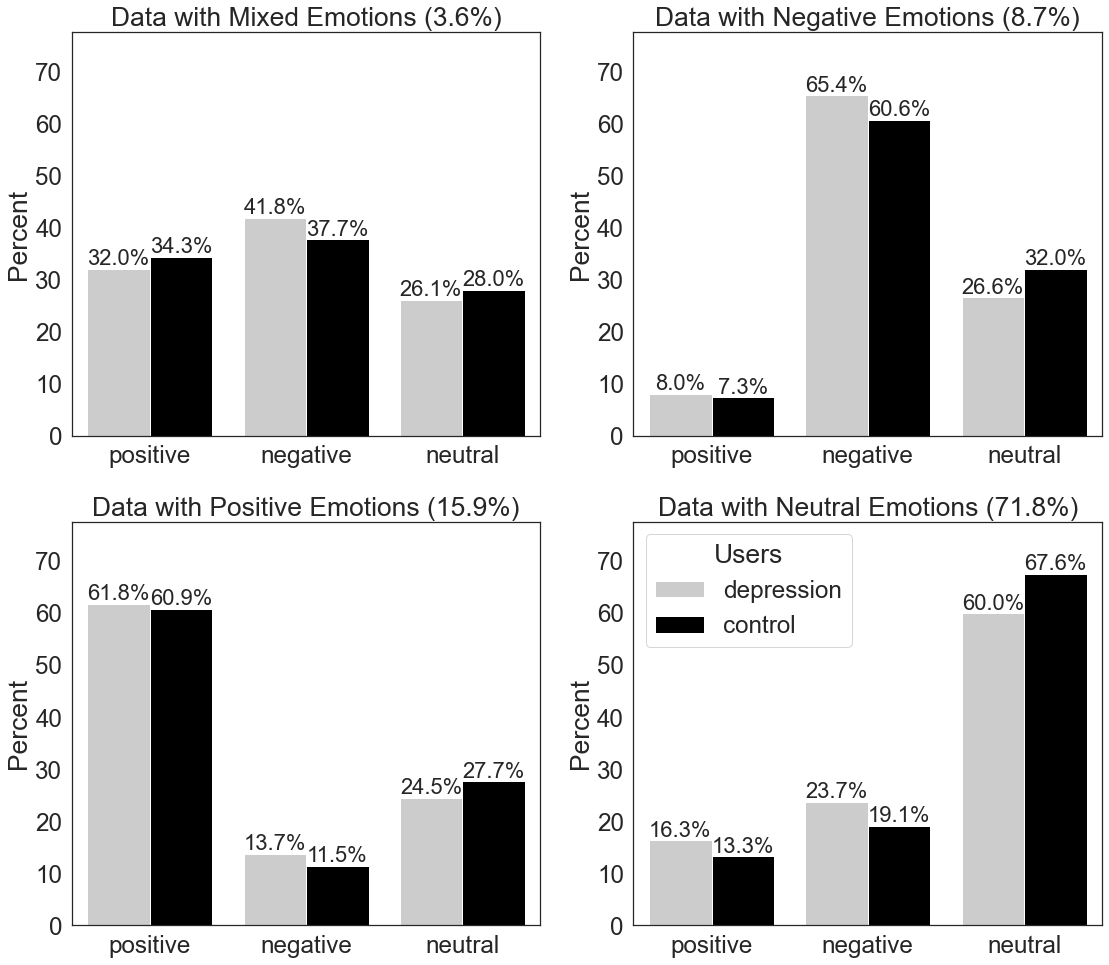

In [21]:
from matplotlib.ticker import FuncFormatter

sns.set(style="white")
sns.set_context("notebook", font_scale=2.2)  # Adjust font scale to fit better in smaller plots

# Custom grayscale palette
custom_grayscale_palette = ["#cccccc", "#000000"]
sns.set_palette(custom_grayscale_palette)

# Order of sentiments
sentiment_order = ['positive', 'negative', 'neutral']

# Custom function to format y-axis ticks
def y_tick_format(x, pos):
    return f'{x:.0f}'

# Create subplots
fig, axes = plt.subplots(2,2, figsize=(16, 14))  # Adjusted to 2x3 grid
axes = axes.flatten()  # Flatten to ease the iteration

datasets = [
    (data_mixed, "Data with Mixed Emotions (3.6%)"),
    (data_neg, "Data with Negative Emotions (8.7%)"),
    (data_pos, "Data with Positive Emotions (15.9%)"),
    (data_neu, "Data with Neutral Emotions (71.8%)")
]

max_proportion = 0
for data, title in datasets:
    data['users'] = data['users'].replace({'clinical': 'depression'})
    df = data.groupby('users')['sentiments'].value_counts(normalize=True).mul(100).reset_index(name='proportion')
    max_proportion = max(max_proportion, df['proportion'].max())

for i, (data, title) in enumerate(datasets):
    df = data.groupby('users')['sentiments'].value_counts(normalize=True).mul(100).reset_index(name='proportion')
    df['sentiments'] = df['sentiments'].astype(str)
    ax = sns.barplot(data=df, x='sentiments', y='proportion', hue='users', ax=axes[i], order=sentiment_order, hue_order=['depression', 'control'])
    ax.set_title(title)
    ax.set_ylim(0, max_proportion + 10)
    ax.yaxis.set_major_formatter(FuncFormatter(y_tick_format))

    # Add annotations
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=22)

    # Hide the legend on individual subplots
    ax.get_legend().remove()

    ax.set_ylabel('Percent')
    ax.set_xlabel('')

handles, labels = axes[0].get_legend_handles_labels()

plt.legend(handles, labels, loc='best', title='Users')

# Adjust layout
plt.tight_layout()

plt.savefig("sentiment_distribution_across_datas_without_overall.pdf", format='pdf', transparent=False, bbox_inches="tight", pad_inches=0.1, dpi=300)
plt.show()

# Anger and Sadness in mixed emotions

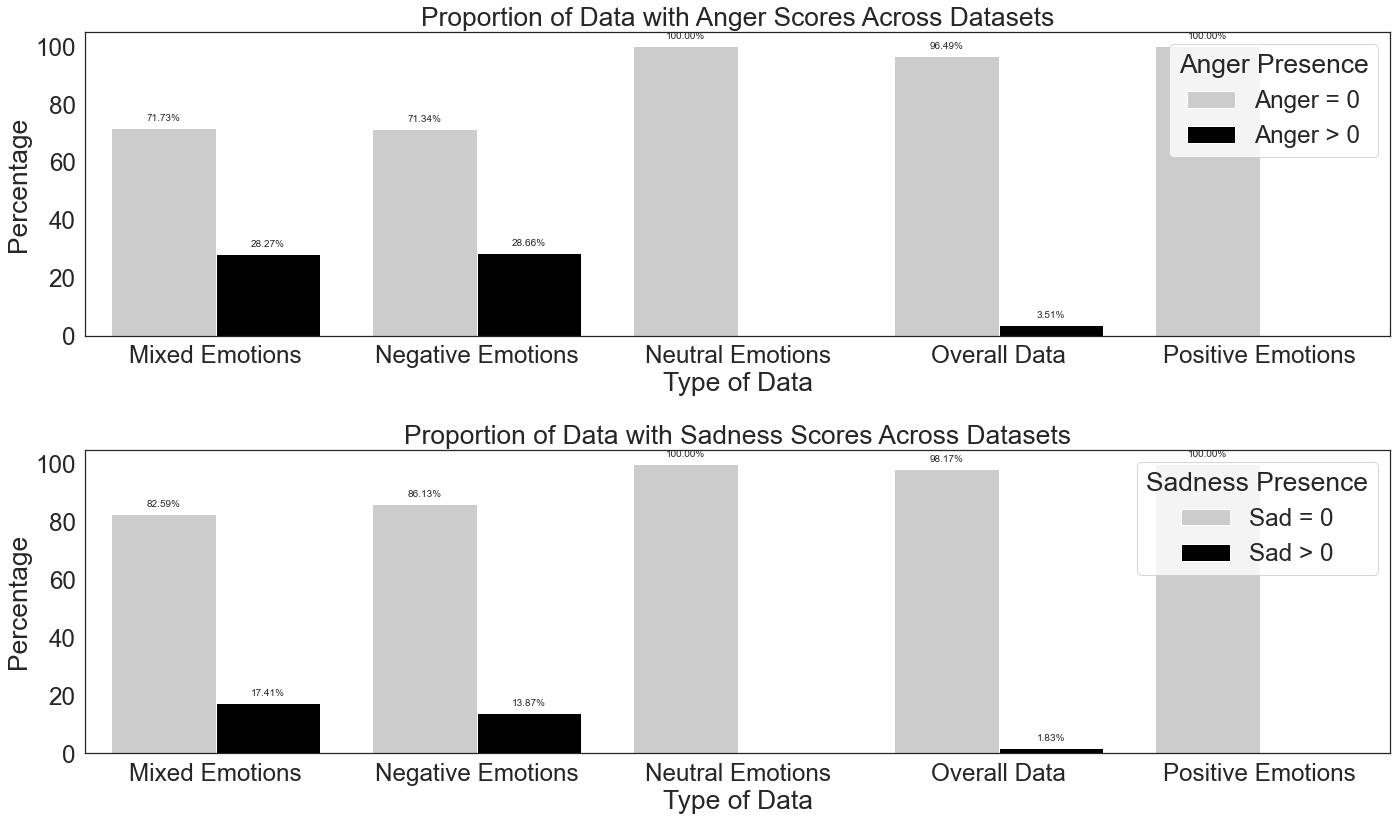

In [22]:
# Calculate presence of Anger and Sadness
consolidated_data['Anger Presence'] = consolidated_data['emo_anger'].apply(lambda x: 'Anger > 0' if x > 0 else 'Anger = 0')
consolidated_data['Sadness Presence'] = consolidated_data['emo_sad'].apply(lambda x: 'Sad > 0' if x > 0 else 'Sad = 0')

# Group by for each emotion type
def emotion_distribution(data, emotion):
    distribution = data.groupby(['Dataset', emotion]).size().reset_index(name='Counts')
    total_counts = distribution.groupby('Dataset')['Counts'].transform('sum')
    distribution['Proportion'] = 100 * distribution['Counts'] / total_counts
    return distribution

anger_distribution = emotion_distribution(consolidated_data, 'Anger Presence')
sadness_distribution = emotion_distribution(consolidated_data, 'Sadness Presence')

# Create plot layout
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Plot for Anger
sns.barplot(data=anger_distribution, x='Dataset', y='Proportion', hue='Anger Presence', ax=axes[0])
axes[0].set_ylabel('Percentage')
axes[0].set_xlabel('Type of Data')
axes[0].set_title('Proportion of Data with Anger Scores Across Datasets')

# Add annotations for each bar in the Anger barplot
for p in axes[0].patches:
    height = p.get_height()
    if height != 0:
        axes[0].annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Plot for Sadness
sns.barplot(data=sadness_distribution, x='Dataset', y='Proportion', hue='Sadness Presence', ax=axes[1])
axes[1].set_ylabel('Percentage')
axes[1].set_xlabel('Type of Data')
axes[1].set_title('Proportion of Data with Sadness Scores Across Datasets')

# Add annotations for each bar in the Sadness barplot
for p in axes[1].patches:
    height = p.get_height()
    if height != 0:
        axes[1].annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
#plt.savefig("anger_sad_across_data_types.pdf", format='pdf', transparent=False, bbox_inches="tight", pad_inches=0.1, dpi=300)

plt.show()


In [23]:
data_mixed['Dataset'] = 'Data With Mixed Emotions'
data_neg['Dataset'] = 'Data With Neg Emotions'  
data_neu['Dataset'] = 'Data With Neutral Emotions'
data_pos['Dataset'] = 'Data With Pos Emotions'
data_overall['Dataset'] = 'Data Overall'

df_mixed = data_mixed[data_mixed['emo_anger'] > 0]
df_neg = data_neg[data_neg['emo_anger'] > 0]
df_pos = data_pos[data_pos['emo_anger'] > 0]
df_neu = data_neu[data_neu['emo_anger'] > 0]
df_all = data_overall[data_overall['emo_anger'] > 0]

combined_df_anger = pd.concat([df_mixed, df_neg, df_pos, df_neu, df_all],axis = 0,ignore_index=True)

df_mixed_ = data_mixed[data_mixed['emo_sad'] > 0]
df_neg_ = data_neg[data_neg['emo_sad'] > 0]
df_pos_ = data_pos[data_pos['emo_sad'] > 0]
df_neu_ = data_neu[data_neu['emo_sad'] > 0]
df_all_ = data_overall[data_overall['emo_sad'] > 0]

combined_df_sad = pd.concat([df_mixed_, df_neg_, df_pos_, df_neu_, df_all_],axis = 0,ignore_index=True)

<ipython-input-32-0ee5a1354f46>:22: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  lineplot = sns.lineplot(data=data, x='sentiments', y='median_emo', hue='Dataset', style='Dataset',palette = custom_grayscale_palette, markers=True, ax=ax)
<ipython-input-32-0ee5a1354f46>:22: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  lineplot = sns.lineplot(data=data, x='sentiments', y='median_emo', hue='Dataset', style='Dataset',palette = custom_grayscale_palette, markers=True, ax=ax)


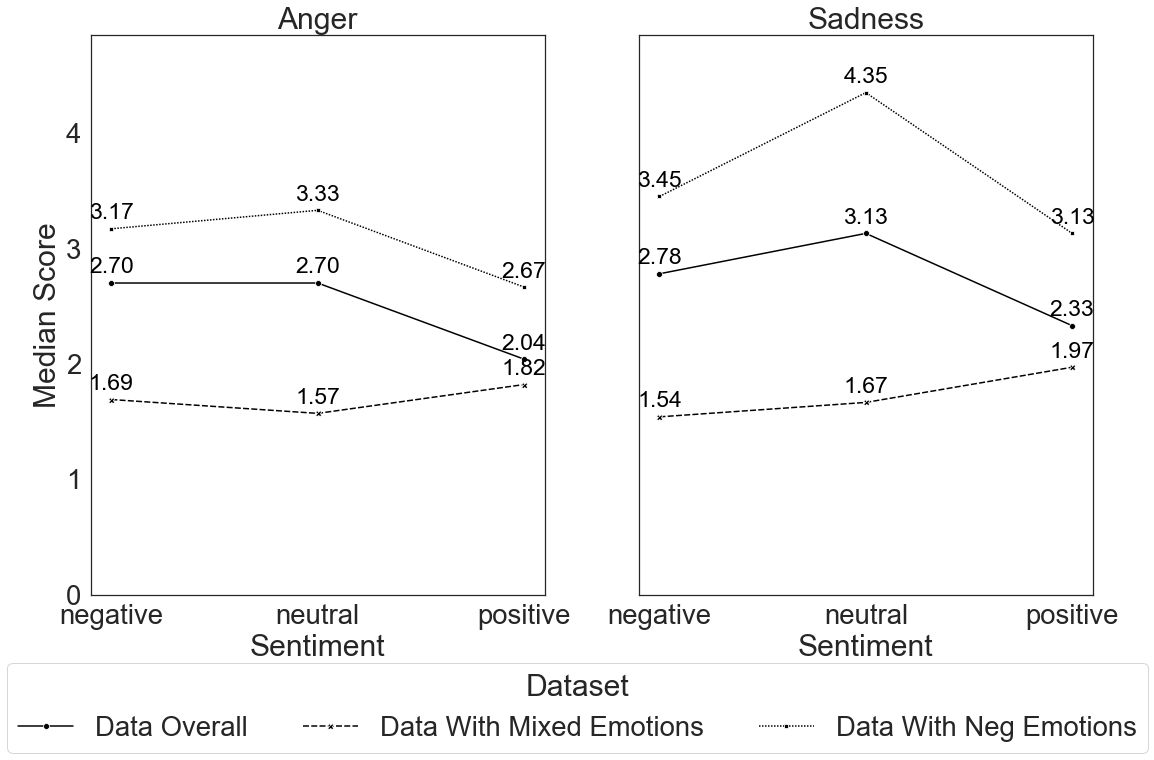

In [32]:

sns.set(style="white")
sns.set_context("notebook", font_scale=2.5)  # Adjust font scale to fit better in smaller plots

# Custom grayscale palette
custom_grayscale_palette = [ "#000000"]
sns.set_palette(custom_grayscale_palette)


# Calculate median scores for emo_anger
stats_df_anger = combined_df_anger.groupby(['sentiments', 'Dataset'])['emo_anger'].median().reset_index()
stats_df_anger.columns = ['sentiments', 'Dataset', 'median_emo']  

# Calculate median scores for emo_sad
stats_df_sad = combined_df_sad.groupby(['sentiments', 'Dataset'])['emo_sad'].median().reset_index()
stats_df_sad.columns = ['sentiments', 'Dataset', 'median_emo']  

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16,10), sharey=True)  # Share Y axis for scale comparison

# Define a common function to plot and annotate each subplot
def plot_line_and_annotate(ax, data, title):
    lineplot = sns.lineplot(data=data, x='sentiments', y='median_emo', hue='Dataset', style='Dataset',palette = custom_grayscale_palette, markers=True, ax=ax)
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        for (xi, yi) in zip(x_data, y_data):
            ax.text(xi, yi + 0.05, f'{yi:.2f}', color='black', size=23, verticalalignment='bottom', horizontalalignment='center')
    ax.set_title(title)
    ax.set_xlabel("Sentiment")
    ax.set_ylabel("Median Score")
    ax.set_ylim(0, max(data['median_emo']) + 0.5)  # Set y-axis limits starting from 0
    lineplot.legend_.remove()  # Remove individual legends

# Plot for emo_anger
plot_line_and_annotate(axes[0], stats_df_anger, "Anger")

# Plot for emo_sad
plot_line_and_annotate(axes[1], stats_df_sad, "Sadness")

# Place one common legend on the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, title="Dataset", bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.savefig("anger_sad_across_data_types.pdf", format='pdf', transparent=False, bbox_inches="tight", pad_inches=0.1, dpi=300)

plt.show()
